### Importing necessary libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

### Reading the Datasets


In [59]:
train = pd.read_csv('training_v2.csv')
test = pd.read_csv('unlabeled.csv')

In [60]:
train.head(2)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [61]:
train.shape

(91713, 186)

#### Countplot of the target to check if the data is imbalanced or not.

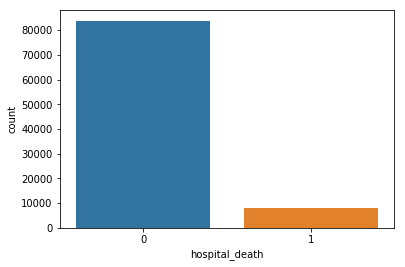

In [62]:
sns.countplot( train['hospital_death'])

In [63]:
# data_box=data.drop(['ID','Match_ID','Target','Commentary'],axis=1)
# sns.boxplot(data=data_box,palette='coolwarm',orient='h')

#### Since the data is imbalanced, we should use sampling methods to improve the model.

### Missing Value Analysis

In [64]:
#Replacing missing values with NaN
# train = train.replace(' ', np.NaN)

train.isna().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

#### As there are lot of variables with missing values, removing variables with more 50% data missing.

In [65]:
cols=train.columns
rejected = []
accepted = []
for i in cols:
    missing_percent = (train[i].isna().sum()/len(train))*100
    if missing_percent > 50: 
        rejected.append(i)  
        print("Rejected",i,missing_percent)
    elif missing_percent > 0 and missing_percent < 60:
        accepted.append(i)
        print("Accepted",i,missing_percent)

Accepted age 4.610033473989511
Accepted bmi 3.738837460338229
Accepted ethnicity 1.5210493605050537
Accepted gender 0.027258949112993792
Accepted height 1.454537524669349
Accepted hospital_admit_source 23.343473662403365
Accepted icu_admit_source 0.12212009202621221
Accepted weight 2.965773663493725
Rejected albumin_apache 59.292575752619584
Accepted apache_2_diagnosis 1.8121749370318276
Accepted apache_3j_diagnosis 1.2004841189362467
Accepted arf_apache 0.7796059446316226
Rejected bilirubin_apache 63.38686990939125
Accepted bun_apache 21.00247511257946
Accepted creatinine_apache 20.55651870509088
Rejected fio2_apache 77.27148822958577
Accepted gcs_eyes_apache 2.072770490552048
Accepted gcs_motor_apache 2.072770490552048
Accepted gcs_unable_apache 1.1307012092069826
Accepted gcs_verbal_apache 2.072770490552048
Accepted glucose_apache 12.033190496439982
Accepted heart_rate_apache 0.957334292848342
Accepted hematocrit_apache 21.67413561872363
Accepted intubated_apache 0.7796059446316226


In [66]:
print(len(rejected))

74


#### Dropping the rejected variables , id columns 

In [67]:
# target = train[['hospital_death']]
train.drop(['icu_id','encounter_id', 'patient_id', 'hospital_id','albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min'],inplace=True,axis=1)
train.shape

(91713, 108)

#### Dividing categorical, numerical data for further analysis

In [68]:
Categorical_var = []
numerical_var=[]
binary_var=[]
for i in accepted:
    if train[i].dtypes =='object':
        Categorical_var.append(i)
    elif train[i].dtypes =='float64' or train[i].dtypes =='int64':
        if len(train[i].unique()) > 3:
            numerical_var.append(i)
        else:
            binary_var.append(i)
# print("Categorical_var")
# print(Categorical_var)
# print("numerical_var")
# print(numerical_var)
# print("binary_var")
# print(binary_var)

In [76]:
for i in numerical_var:
    median = train[i].median()
    std = train[i].std()
    outliers = (train[i] - median).abs() >  (std)
    print(outliers)
    train[outliers] = np.nan
    train[i].fillna(median, inplace=True)
    

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
91683    False
91684    False
91685    False
91686    False
91687    False
91688    False
91689    False
91690    False
91691    False
91692    False
91693    False
91694    False
91695    False
91696    False
91697    False
91698    False
91699    False
91700    False
91701    False
91702    False
91703    False
91704    False
91705    False
91706    False
91707    False
91708    False
91709    False
91710    False
91711    False
91712    False
Name: age, Length: 91713, dtype: bool
0        False
1        False
2        False
3 

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
91683    False
91684    False
91685    False
91686    False
91687    False
91688    False
91689    False
91690    False
91691    False
91692    False
91693    False
91694    False
91695    False
91696    False
91697    False
91698    False
91699    False
91700    False
91701    False
91702    False
91703    False
91704    False
91705    False
91706    False
91707    False
91708    False
91709    False
91710    False
91711    False
91712    False
Name: gcs_motor_apache, Length: 91713, dtype: bool
0        False
1        False
2   

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
91683    False
91684    False
91685    False
91686    False
91687    False
91688    False
91689    False
91690    False
91691    False
91692    False
91693    False
91694    False
91695    False
91696    False
91697    False
91698    False
91699    False
91700    False
91701    False
91702    False
91703    False
91704    False
91705    False
91706    False
91707    False
91708    False
91709    False
91710    False
91711    False
91712    False
Name: wbc_apache, Length: 91713, dtype: bool
0        False
1        False
2        F

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
91683    False
91684    False
91685    False
91686    False
91687    False
91688    False
91689    False
91690    False
91691    False
91692    False
91693    False
91694    False
91695    False
91696    False
91697    False
91698    False
91699    False
91700    False
91701    False
91702    False
91703    False
91704    False
91705    False
91706    False
91707    False
91708    False
91709    False
91710    False
91711    False
91712    False
Name: d1_mbp_noninvasive_max, Length: 91713, dtype: bool
0        False
1        Fals

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
91683    False
91684    False
91685    False
91686    False
91687    False
91688    False
91689    False
91690    False
91691    False
91692    False
91693    False
91694    False
91695    False
91696    False
91697    False
91698    False
91699    False
91700    False
91701    False
91702    False
91703    False
91704    False
91705    False
91706    False
91707    False
91708    False
91709    False
91710    False
91711    False
91712    False
Name: d1_sysbp_noninvasive_min, Length: 91713, dtype: bool
0        False
1        Fa

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
91683    False
91684    False
91685    False
91686    False
91687    False
91688    False
91689    False
91690    False
91691    False
91692    False
91693    False
91694    False
91695    False
91696    False
91697    False
91698    False
91699    False
91700    False
91701    False
91702    False
91703    False
91704    False
91705    False
91706    False
91707    False
91708    False
91709    False
91710    False
91711    False
91712    False
Name: h1_mbp_max, Length: 91713, dtype: bool
0        False
1        False
2        F

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
91683    False
91684    False
91685    False
91686    False
91687    False
91688    False
91689    False
91690    False
91691    False
91692    False
91693    False
91694    False
91695    False
91696    False
91697    False
91698    False
91699    False
91700    False
91701    False
91702    False
91703    False
91704    False
91705    False
91706    False
91707    False
91708    False
91709    False
91710    False
91711    False
91712    False
Name: h1_sysbp_min, Length: 91713, dtype: bool
0        False
1        False
2       

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
91683    False
91684    False
91685    False
91686    False
91687    False
91688    False
91689    False
91690    False
91691    False
91692    False
91693    False
91694    False
91695    False
91696    False
91697    False
91698    False
91699    False
91700    False
91701    False
91702    False
91703    False
91704    False
91705    False
91706    False
91707    False
91708    False
91709    False
91710    False
91711    False
91712    False
Name: d1_creatinine_max, Length: 91713, dtype: bool
0        False
1        False
2  

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
91683    False
91684    False
91685    False
91686    False
91687    False
91688    False
91689    False
91690    False
91691    False
91692    False
91693    False
91694    False
91695    False
91696    False
91697    False
91698    False
91699    False
91700    False
91701    False
91702    False
91703    False
91704    False
91705    False
91706    False
91707    False
91708    False
91709    False
91710    False
91711    False
91712    False
Name: d1_hematocrit_min, Length: 91713, dtype: bool
0        False
1        False
2  

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
91683    False
91684    False
91685    False
91686    False
91687    False
91688    False
91689    False
91690    False
91691    False
91692    False
91693    False
91694    False
91695    False
91696    False
91697    False
91698    False
91699    False
91700    False
91701    False
91702    False
91703    False
91704    False
91705    False
91706    False
91707    False
91708    False
91709    False
91710    False
91711    False
91712    False
Name: apache_4a_hospital_death_prob, Length: 91713, dtype: bool
0        False
1     

In [70]:
for i in numerical_var:
    std = train[i].describe()[2]
    mean = train[i].describe()[1]
    lb  = mean -(std * 3)  
    ub = mean +(std * 3)
    if detect_outlier(train,i) >0:
        train[i] = train[i].apply(lambda x : mean if (x > ub) or (x < lb) else x )
        print(i,mean)

bmi 28.635786583863705
weight 82.69150794301997
bun_apache 23.891900082690032
gcs_motor_apache 5.7471477756213165
glucose_apache 153.21088184777585
sodium_apache 138.06016752185567
wbc_apache 11.622873932778026
d1_mbp_max 103.82615032399904
d1_mbp_noninvasive_max 103.79567364323934
d1_resprate_max 27.891369287517445
d1_spo2_min 91.50428614889707
d1_sysbp_max 147.75157670213113
d1_sysbp_noninvasive_max 147.65018258640634
d1_temp_max 37.26357006778247
d1_temp_min 36.347013846219404
h1_diasbp_max 74.69308942747568
h1_diasbp_noninvasive_max 75.15273865639908
h1_mbp_max 90.93895781944657
h1_mbp_noninvasive_max 90.99009000348136
h1_resprate_max 22.160314667013154
h1_resprate_min 16.95759315498523
h1_spo2_min 95.70824620504062
h1_sysbp_noninvasive_max 132.43181830870589
h1_temp_max 36.722005839588974
h1_temp_min 36.636843232172644
d1_bun_max 23.80070475142024
d1_bun_min 22.04693605247357
d1_glucose_max 167.08947629775471
d1_hco3_max 24.23062789415871
d1_sodium_max 139.11030963013812
d1_wbc_ma

In [74]:
outliers=[]
def detect_outlier(df,column_name):
    std = df[column_name].describe()[2]
    mean = df[column_name].describe()[1]
    
    lb  = mean -(std * 3)  
    ub = mean +(std * 3) 
    
    l=df.shape[1]
    count=0
    for i in range(l):
        if df[column_name][i] < lb or df[column_name][i] > ub:
            count+=1
            outliers.append(df[column_name][i])
            
#     Replacing with mean using lambda function if there are any outliers
#     df[column_name] = df[column_name].apply(lambda x : mean if (x > ub) or (x < lb) else x )
    return count
for i in numerical_var:
    print(i,detect_outlier(train,i))

age 0
bmi 0
height 0
weight 0
apache_2_diagnosis 0
apache_3j_diagnosis 0
bun_apache 1
creatinine_apache 2
gcs_eyes_apache 1
gcs_motor_apache 3
gcs_verbal_apache 1
glucose_apache 0
heart_rate_apache 2
hematocrit_apache 0
map_apache 1
resprate_apache 0
sodium_apache 1
temp_apache 2
wbc_apache 1
d1_diasbp_max 0
d1_diasbp_min 0
d1_diasbp_noninvasive_max 0
d1_diasbp_noninvasive_min 0
d1_heartrate_max 1
d1_heartrate_min 1
d1_mbp_max 0
d1_mbp_min 1
d1_mbp_noninvasive_max 0
d1_mbp_noninvasive_min 1
d1_resprate_max 6
d1_resprate_min 1
d1_spo2_max 1
d1_spo2_min 2
d1_sysbp_max 4
d1_sysbp_min 1
d1_sysbp_noninvasive_max 4
d1_sysbp_noninvasive_min 1
d1_temp_max 1
d1_temp_min 1
h1_diasbp_max 0
h1_diasbp_min 1
h1_diasbp_noninvasive_max 1
h1_diasbp_noninvasive_min 1
h1_heartrate_max 4
h1_heartrate_min 4
h1_mbp_max 2
h1_mbp_min 2
h1_mbp_noninvasive_max 2
h1_mbp_noninvasive_min 2
h1_resprate_max 1
h1_resprate_min 4
h1_spo2_max 0
h1_spo2_min 2
h1_sysbp_max 3
h1_sysbp_min 0
h1_sysbp_noninvasive_max 3
h1_sy

#### Imputing numerical continuous variables with mean

In [ ]:
train[numerical_var] = train[numerical_var].fillna(train[numerical_var].mean())
train[numerical_var].head(3)

#### Dropping observations of Binary variables with missing values

In [ ]:
# train.dropna(subset=binary_var,inplace=True,axis=0)
train[binary_var] = train[binary_var].fillna('Unknown')
train[binary_var].head(10)
train.shape

#### Imputing Categorical variable with a new value " Unknown"

In [ ]:
train[Categorical_var] = train[Categorical_var].fillna('Unknown')
train[Categorical_var].head(10)

In [ ]:
# data_box=data.drop(['ID','Match_ID','Target','Commentary'],axis=1)
sns.boxplot(data=train[numerical_var],palette='coolwarm',orient='h')

In [51]:
outliers=[]
def detect_outlier(df,column_name):
    std = df[column_name].describe()[2]
    mean = df[column_name].describe()[1]
    
    lb  = mean -(std * 3)  
    ub = mean +(std * 3) 
    
    l=df.shape[1]
    count=0
    for i in range(l):
        if df[column_name][i] < lb or df[column_name][i] > ub:
            count+=1
            outliers.append(df[column_name][i])
            
#     Replacing with mean using lambda function if there are any outliers
    df[column_name] = df[column_name].apply(lambda x : mean if (x > ub) or (x < lb) else x )
    return count
for i in numerical_var:
    print(i,detect_outlier(train,i))

age 0
bmi 0
height 0
weight 1
apache_2_diagnosis 0
apache_3j_diagnosis 0
bun_apache 3
creatinine_apache 3
gcs_eyes_apache 0
gcs_motor_apache 5
gcs_verbal_apache 0
glucose_apache 3
heart_rate_apache 0
hematocrit_apache 0
map_apache 0
resprate_apache 0
sodium_apache 0
temp_apache 4
wbc_apache 1
d1_diasbp_max 1
d1_diasbp_min 0
d1_diasbp_noninvasive_max 1
d1_diasbp_noninvasive_min 0
d1_heartrate_max 0
d1_heartrate_min 0
d1_mbp_max 0
d1_mbp_min 0
d1_mbp_noninvasive_max 0
d1_mbp_noninvasive_min 0
d1_resprate_max 3
d1_resprate_min 0
d1_spo2_max 1
d1_spo2_min 5
d1_sysbp_max 0
d1_sysbp_min 0
d1_sysbp_noninvasive_max 0
d1_sysbp_noninvasive_min 0
d1_temp_max 1
d1_temp_min 5
h1_diasbp_max 1
h1_diasbp_min 0
h1_diasbp_noninvasive_max 1
h1_diasbp_noninvasive_min 0
h1_heartrate_max 0
h1_heartrate_min 0
h1_mbp_max 1
h1_mbp_min 0
h1_mbp_noninvasive_max 0
h1_mbp_noninvasive_min 0
h1_resprate_max 1
h1_resprate_min 0
h1_spo2_max 1
h1_spo2_min 2
h1_sysbp_max 0
h1_sysbp_min 0
h1_sysbp_noninvasive_max 1
h1_sy

#### Generating get_dummies for the training data

In [14]:
train = pd.get_dummies(train)

In [15]:
train.head(1)

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,...,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,apache_2_bodysystem_Unknown
0,0,68.0,22.73,0,180.3,0.541667,0,73.9,113.0,502.01,...,0,0,0,0,0,0,0,0,0,0


#### Splitting the  dependent and independent variables

In [16]:
y = train[['hospital_death']]
X = train.drop(['hospital_death'],axis=1)

#### Standardizing the train data

In [17]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

#### Splitting the train data into training and testing data and applying different modeling techiques to choose the best one

In [211]:
%%time
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,y,test_size=0.3,random_state=216)
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RNDF', RandomForestClassifier()))
# models.append(('NB', naive_bayes.MultinomialNB()))
models.append(('SVM', SVC(C=1.0, kernel='linear', degree=3,gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(Train_X,Train_Y)
    predictions_NB = model.predict(Test_X)
    # Use accuracy_score function to get the accuracy
    print("{} model Accuracy Score -> {} " .format(name,accuracy_score(predictions_NB, Test_Y)*100))
    print("{} model Recall Score -> {} " .format(name,recall_score(predictions_NB, Test_Y)*100))

LR model Accuracy Score -> 92.48979891923685 
LR model Recall Score -> 64.71734892787524 
KNN model Accuracy Score -> 91.9530934088152 
KNN model Recall Score -> 66.38655462184873 
CART model Accuracy Score -> 88.27335220380105 
CART model Recall Score -> 33.42487249901922 
RNDF model Accuracy Score -> 92.91254641032239 
RNDF model Recall Score -> 74.67455621301775 
SVM model Accuracy Score -> 92.17733338234754 
SVM model Recall Score -> 75.77197149643705 
Wall time: 8h 28min 53s


#### We are going to use RNDF and more ensemble techiques because it gave us better Recall score and its faster .

In [18]:
%%time
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,y,test_size=0.3,random_state=216)
models = []
models.append(('RNDF', RandomForestClassifier()))
models.append(('ADBC', AdaBoostClassifier(n_estimators=100)))
models.append(('GCB', GradientBoostingClassifier(n_estimators=100)))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(Train_X,Train_Y)
    predictions_NB = model.predict(Test_X)
    # Use accuracy_score function to get the accuracy
    print("{} model Accuracy Score -> {} " .format(name,accuracy_score(predictions_NB, Test_Y)*100))
    print("{} model Recall Score -> {} " .format(name,recall_score(predictions_NB, Test_Y)*100))
    print("{} model F1 Score -> {} " .format(name,f1_score(predictions_NB, Test_Y)*100))

RNDF model Accuracy Score -> 92.63284146252818 
RNDF model Recall Score -> 76.2130177514793 
RNDF model F1 Score -> 38.853695324283564 
ADBC model Accuracy Score -> 92.42930871556298 
ADBC model Recall Score -> 65.89975349219392 
ADBC model F1 Score -> 43.50420395985897 
GCB model Accuracy Score -> 92.7200697826561 
GCB model Recall Score -> 70.86684539767649 
GCB model F1 Score -> 44.190582334912236 
XGB model Accuracy Score -> 92.70916624264011 
XGB model Recall Score -> 72.61208576998051 
XGB model F1 Score -> 42.62013729977117 
Wall time: 14min 22s


#### Since the data is imbalanced we used SMOTE method and further applying the models

In [19]:
from imblearn.over_sampling import SMOTE

# setting up testing and training sets
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,y,test_size=0.3,random_state=216)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(Train_X, Train_Y)
models = []
models.append(('RNDF', RandomForestClassifier()))
models.append(('ADBC', AdaBoostClassifier(n_estimators=100)))
models.append(('GCB', GradientBoostingClassifier(n_estimators=100)))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(Train_X,Train_Y)
    predictions_NB = model.predict(Test_X)
    # Use accuracy_score function to get the accuracy
    print("{} model Accuracy Score -> {} " .format(name,accuracy_score(predictions_NB, Test_Y)*100))
    print("{} model Recall Score -> {} " .format(name,recall_score(predictions_NB, Test_Y)*100))
    print("{} model F1 Score -> {} " .format(name,f1_score(predictions_NB, Test_Y)*100))

RNDF model Accuracy Score -> 92.62193792251217 
RNDF model Recall Score -> 75.34562211981567 
RNDF model F1 Score -> 39.18514080287597 
ADBC model Accuracy Score -> 92.42930871556298 
ADBC model Recall Score -> 65.89975349219392 
ADBC model F1 Score -> 43.50420395985897 
GCB model Accuracy Score -> 92.7200697826561 
GCB model Recall Score -> 70.86684539767649 
GCB model F1 Score -> 44.190582334912236 
XGB model Accuracy Score -> 92.70916624264011 
XGB model Recall Score -> 72.61208576998051 
XGB model F1 Score -> 42.62013729977117 


#### Since the Recall and F1 score have not improved, we are not going to use SMOTE.

## Preparing the testing data

In [20]:
test = pd.read_csv('unlabeled.csv')

encounter_id = test['encounter_id']

In [21]:
test.shape

(39308, 186)

In [22]:
# Dropping the rejected variables , id columns  from Test data
test.drop(['icu_id','encounter_id', 'patient_id', 'hospital_id','albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min'],inplace=True,axis=1)


In [23]:
# Imputing numerical continuous variables with mean in test data
test[numerical_var] = test[numerical_var].fillna(test[numerical_var].mean())
test[numerical_var].head(3)

,age,bmi,height,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,56.000000,21.102439,180.3,68.6,301.0,405.01,19.000000,0.670000,2.0,5.0,...,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,0.13,0.08
1,61.313991,19.500595,145.0,41.0,217.0,1502.02,25.476898,1.485251,4.0,6.0,...,93.0,93.0,4.4,4.4,140.0,140.0,3.0,3.0,0.09,0.03
2,66.000000,32.518596,170.2,94.2,302.0,1208.06,22.000000,1.840000,2.0,5.0,...,184.0,181.0,4.7,4.5,135.0,130.0,14.8,10.0,0.03,0.02


In [24]:
#Dropping observations of Binary variables with missing values
# test.dropna(subset=binary_var,inplace=True,axis=0)
test[binary_var] = test[binary_var].fillna('Unknown')

In [25]:
# Imputing Categorical variable with a new value " Unknown"
test[Categorical_var] = test[Categorical_var].fillna('Unknown')
test[Categorical_var].head(10)

,ethnicity,gender,hospital_admit_source,icu_admit_source,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Emergency Department,Accident & Emergency,Neurological,Neurologic
1,Caucasian,F,Operating Room,Operating Room / Recovery,Neurological,Neurologic
2,African American,M,Operating Room,Operating Room / Recovery,Cardiovascular,Cardiovascular
3,Caucasian,M,Operating Room,Operating Room / Recovery,Respiratory,Respiratory
4,Caucasian,M,Emergency Department,Accident & Emergency,Neurological,Neurologic
5,African American,M,Emergency Department,Accident & Emergency,Sepsis,Cardiovascular
6,Caucasian,F,Unknown,Accident & Emergency,Respiratory,Respiratory
7,Caucasian,M,Emergency Department,Accident & Emergency,Neurological,Neurologic
8,Caucasian,F,Unknown,Floor,Cardiovascular,Cardiovascular
9,African American,F,Floor,Floor,Respiratory,Respiratory


In [26]:
# Generating get_dummies for the training data
test = test.drop('hospital_death',axis=1)
test = pd.get_dummies(test)
test_cols = test.columns

In [27]:
from sklearn.preprocessing import StandardScaler
test = StandardScaler().fit_transform(test)

In [28]:
test.shape,train.shape

((39308, 188), (91713, 190))

#### Choosing the variables that are only present in the test data

In [29]:
X = train[test_cols] 

#### Random Forest classifier on test data

In [30]:
%%time
model = RandomForestClassifier()
model.fit(X,y)
prediction = model.predict(test)
# print(prediction)
# print(encounter_id)
submission = pd.DataFrame({
        "encounter_id": encounter_id,
        "hospital_death": prediction
    })

submission.to_csv('submission_rndf.csv', index=False)

Wall time: 2min 38s


In [34]:
%%time
model = AdaBoostClassifier(n_estimators=100)
model.fit(X,y)
prediction = model.predict(test)
# print(prediction)
# print(encounter_id)
submission = pd.DataFrame({
        "encounter_id": encounter_id,
        "hospital_death": prediction
    })

submission.to_csv('submission_adb.csv', index=False)

Wall time: 3min 8s


In [35]:
%%time
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X,y)
prediction = model.predict(test)
# print(prediction)
# print(encounter_id)
submission = pd.DataFrame({
        "encounter_id": encounter_id,
        "hospital_death": prediction
    })

submission.to_csv('submission_gbc.csv', index=False)

Wall time: 6min 43s


In [36]:
%%time

model = XGBClassifier()
model.fit(X.values,y.values)
prediction = model.predict(test)
# print(prediction)
# print(encounter_id)
submission = pd.DataFrame({
        "encounter_id": encounter_id,
        "hospital_death": prediction
    })

submission.to_csv('submission_xgbc.csv', index=False)

Wall time: 4min 33s
